In [3]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl

seasons = range(2016, 2022 +1)
pbp_py = nfl.import_pbp_data(seasons)

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [5]:
pbp_py_p = \
    pbp_py.query("play_type == 'pass' & air_yards.notnull()").reset_index()

pbp_py_p.head()

,index,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,3,85.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0031171;00-0029542;00-0029566;00-0030073;00...,11.0,11.0,-4.53,2.404,0.0,FLAT,None,None
1,5,130.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0,1.71,2.093,0.0,FLAT,None,None
2,9,216.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BUF,away,...,00-0027004;00-0030046;00-0028112;00-0031325;00...,00-0031170;00-0027560;00-0027965;00-0031296;00...,11.0,10.0,1.61,2.537,0.0,ANGLE,None,None
3,11,261.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BUF,away,...,00-0027004;00-0030046;00-0028112;00-0031325;00...,00-0031170;00-0027560;00-0027965;00-0031296;00...,10.0,10.0,-3.46,2.265,0.0,SCREEN,None,None
4,13,310.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,00-0027714;00-0032965;00-0029893;00-0026223;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0,3.56,1.921,0.0,FLAT,None,None


In [7]:
pbp_py_p["pass_length_air_yards"] = np.where(
    pbp_py_p["air_yards"] >= 20, "long", "short"
)

pbp_py_p["passing_yards"] = np.where(
    pbp_py_p["passing_yards"].isnull(), 0, pbp_py_p["passing_yards"]
)

pbp_py_p["passing_yards"].describe()

count    131606.000000
mean          7.191807
std           9.666765
min         -20.000000
25%           0.000000
50%           5.000000
75%          11.000000
max          98.000000
Name: passing_yards, dtype: float64

In [9]:
pbp_py_p.query(
    'pass_length_air_yards == "short"')["passing_yards"].describe()

count    116085.000000
mean          6.525623
std           7.695175
min         -20.000000
25%           0.000000
50%           5.000000
75%          10.000000
max          95.000000
Name: passing_yards, dtype: float64

In [10]:
pbp_py_p.query(
    'pass_length_air_yards =="long"'
)["passing_yards"]

count    15521.000000
mean        12.174344
std         17.925913
min          0.000000
25%          0.000000
50%          0.000000
75%         26.000000
max         98.000000
Name: passing_yards, dtype: float64

In [12]:
pbp_py_p.query(
    'pass_length_air_yards == "short"'
)["epa"].describe()

count    116084.000000
mean          0.119577
std           1.426167
min         -13.031219
25%          -0.606107
50%          -0.002116
75%           0.959070
max           8.241420
Name: epa, dtype: float64

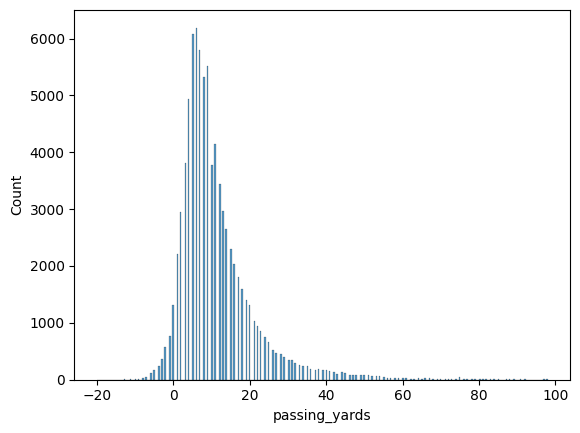

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=pbp_py, x='passing_yards');
plt.show()

AttributeError: 'Axes' object has no attribute 'set_axis_labels'

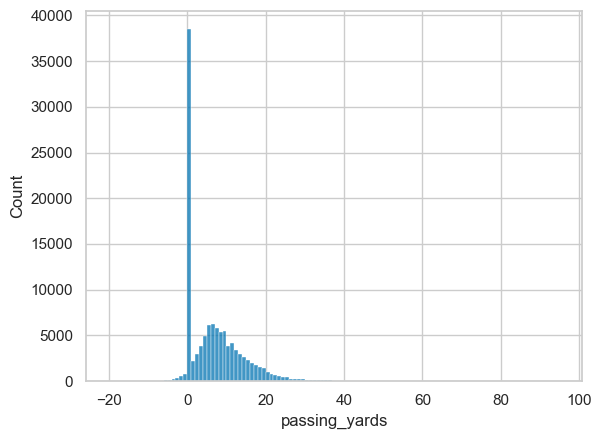

In [18]:
sns.set_theme(style='whitegrid', palette='colorblind')

pbp_py_p_short = pbp_py_p.query(
    'pass_length_air_yards == "short"'
)

pbp_py_hist_short = sns.histplot(
    data=pbp_py_p_short, binwidth=1, x='passing_yards'
);

pbp_py_hist_short.set_axis_labels(
    "Yards gained (or lost) during a passing play", "Count"
);

plt.show()

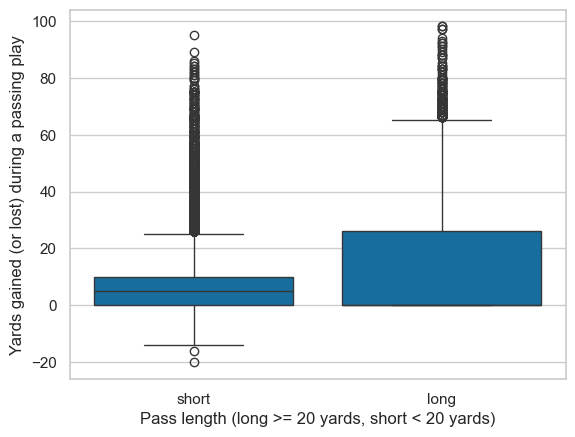

In [19]:
pass_boxplot = \
    sns.boxplot(data=pbp_py_p,
                x="pass_length_air_yards",
                y="passing_yards");

pass_boxplot.set(
    xlabel = "Pass length (long >= 20 yards, short < 20 yards)",
    ylabel = "Yards gained (or lost) during a passing play",
);

plt.show()

In [33]:
pbp_py_p_s = \
    pbp_py_p \
    .groupby(["passer_id", "passer", "season"])\
    .agg({"passing_yards": ["mean", "count"]})

pbp_py_p_s.columns = list(map("_".join, pbp_py_p_s.columns.values))

#renaming the columns
pbp_py_p_s \
    .rename(columns={'passing_yards_mean': 'ypa',
                     'passing_yards_count': 'n'},
                     inplace=True)

In [34]:
pbp_py_p_s\
    .sort_values(by=['ypa'], ascending=False)\
    .head()

,,,ypa,n
passer_id,passer,season,,
00-0035544,T.Kennedy,2021,75.0,1
00-0033132,K.Byard,2018,66.0,1
00-0031235,O.Beckham,2018,53.0,2
00-0030669,A.Wilson,2018,52.0,1
00-0029632,M.Sanu,2017,51.0,1


In [35]:
#query for players with 100 or more pass attempts

pbp_py_p_s_100 = \
    pbp_py_p_s\
    .query("n >= 100")\
    .sort_values(by=["ypa"], ascending=False)

pbp_py_p_s_100.head()

,,,ypa,n
passer_id,passer,season,,
00-0023682,R.Fitzpatrick,2018,9.617887,246
00-0026143,M.Ryan,2016,9.442155,631
00-0029701,R.Tannehill,2019,9.069971,343
00-0033537,D.Watson,2020,8.898524,542
00-0036212,T.Tagovailoa,2022,8.892231,399


In [39]:
#Deep passes versus short passes

pbp_py_p_s_pl = \
    pbp_py_p\
    .groupby(["passer_id", "passer", "season", "pass_length_air_yards"])\
    .agg({"passing_yards": ['mean', 'count']})


#flattening cloumn names and renaming the columns
pbp_py_p_s_pl.columns =\
    list(map("_".join, pbp_py_p_s_pl.columns.values))
pbp_py_p_s_pl\
    .rename(columns={'passing_yards_maen': 'ypa',
                     'passing_yards_mean': 'n'},
                     inplace=True)

#reseting index
pbp_py_p_s_pl.reset_index(inplace=True)

# selectng only short-passing data from passers with more than 100 plays and
# long-passing data for passers with more than 30 such plays

q_value = (
    '(n >= 100 & ' +
    'pass_length_air_yards == "short") | ' +
    '(n >= 30 & ' +
    'pass_length_air_yards == "long")'
)
pbp_py_p_s_pl = pbp_py_p_s_pl.query(q_value).reset_index()
pbp_py_p_s_pl.head()

,index,passer_id,passer,season,pass_length_air_yards,n,passing_yards_count
0,56,00-0022921,L.Fitzgerald,2018,long,32.0,1
1,246,00-0027685,E.Sanders,2019,long,35.0,1
2,350,00-0028954,R.Golden,2017,long,44.0,1
3,415,00-0029632,M.Sanu,2017,long,51.0,1
4,456,00-0030140,T.Way,2016,long,31.0,1


In [38]:
# creating a list of columns to save and a new dataframe
cols_save =\
    ["passer_id", "passer", "season",
    "pass_length_air_yards", "ypa"]

air_yards_py =\
    pbp_py_p_s_pl[cols_save].copy()

KeyError: "['ypa'] not in index"